## Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import dump, load

# Data Preparation

In [3]:
# TRAINING STARTS HERE

path_to_features = "../../data-extension/csv/darryl_221-PCA.csv"
Features = pd.read_csv(path_to_features)

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

# Splitting of data

In [4]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3456, 221), (3456,), (864, 221), (864,))

In [5]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3456, 221), (3456,), (864, 221), (864,))

# SVM

In [6]:
model_SVM = SVC(C=1.0,kernel='rbf',random_state=42)
model_SVM.fit (x_train,y_train)

y_pred = model_SVM.predict (x_test)

print (classification_report(y_test,y_pred))
acc = accuracy_score(y_pred,y_test)
bacc = balanced_accuracy_score(y_pred,y_test)
print('Accuracy',acc)
print("Average Class Accuracy", bacc)

              precision    recall  f1-score   support

       angry       0.77      0.78      0.77       117
        calm       0.72      0.89      0.80       118
     disgust       0.77      0.83      0.80       122
        fear       0.91      0.69      0.78       105
       happy       0.71      0.67      0.69       125
     neutral       0.69      0.38      0.49        52
         sad       0.70      0.68      0.69       112
    surprise       0.75      0.89      0.81       113

    accuracy                           0.75       864
   macro avg       0.75      0.73      0.73       864
weighted avg       0.76      0.75      0.75       864

Accuracy 0.7523148148148148
Average Class Accuracy 0.7531549653715701


# Finding the best kernel with highest accuracy

In [7]:
kernels = ['rbf','linear','poly','sigmoid']
svc = SVC()
hyperParam = [{'kernel':kernels}]
gsv = GridSearchCV(svc,hyperParam,cv=5,verbose=1, scoring='balanced_accuracy')
best_model = gsv.fit(x_train, y_train) # Fitting␣ model with xtrain and y_train
y_pred = best_model.best_estimator_.predict(x_test) # Predicting␣ the results
print("Best HyperParameter: ",gsv.best_params_)
print("Best Average Accuracy :",best_model.score(x_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best HyperParameter:  {'kernel': 'rbf'}
Best Average Accuracy : 0.7262729434183729


Confusion Matrix: 
 [[ 91   6   6   1   8   0   1   4]
 [  0 105   4   0   1   2   6   0]
 [  3   2 101   1   5   3   3   4]
 [ 11   1   1  72   7   0   5   8]
 [ 10   1   6   2  84   3   7  12]
 [  0  17   2   0   6  20   7   0]
 [  3  13   6   3   5   0  76   6]
 [  0   0   6   0   2   1   3 101]]
              precision    recall  f1-score   support

       angry       0.77      0.78      0.77       117
        calm       0.72      0.89      0.80       118
     disgust       0.77      0.83      0.80       122
        fear       0.91      0.69      0.78       105
       happy       0.71      0.67      0.69       125
     neutral       0.69      0.38      0.49        52
         sad       0.70      0.68      0.69       112
    surprise       0.75      0.89      0.81       113

    accuracy                           0.75       864
   macro avg       0.75      0.73      0.73       864
weighted avg       0.76      0.75      0.75       864

Accuracy: 0.7523148148148148
Average Class Accur

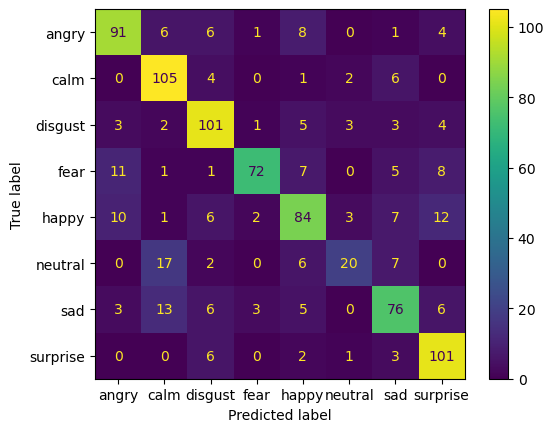

In [8]:
ConfusionMatrixDisplay.from_estimator(gsv, x_test, y_test)
conf_metr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n {}".format(conf_metr))
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Average Class Accuracy:",balanced_accuracy_score(y_test, y_pred))

In [9]:
#Copy the file in the folder and use model: "model = load('filename.joblib')" to load model and use
dump(best_model, 'svm_PCA-221_best.joblib')

['svm_PCA-221_best.joblib']